<a href="https://colab.research.google.com/github/yangchangnaihoby/AI_7th/blob/master/Project_003_dacon_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
val = pd.read_csv('/content/drive/MyDrive/Project_003/val.csv')
test = pd.read_csv('/content/drive/MyDrive/Project_003/test.csv')

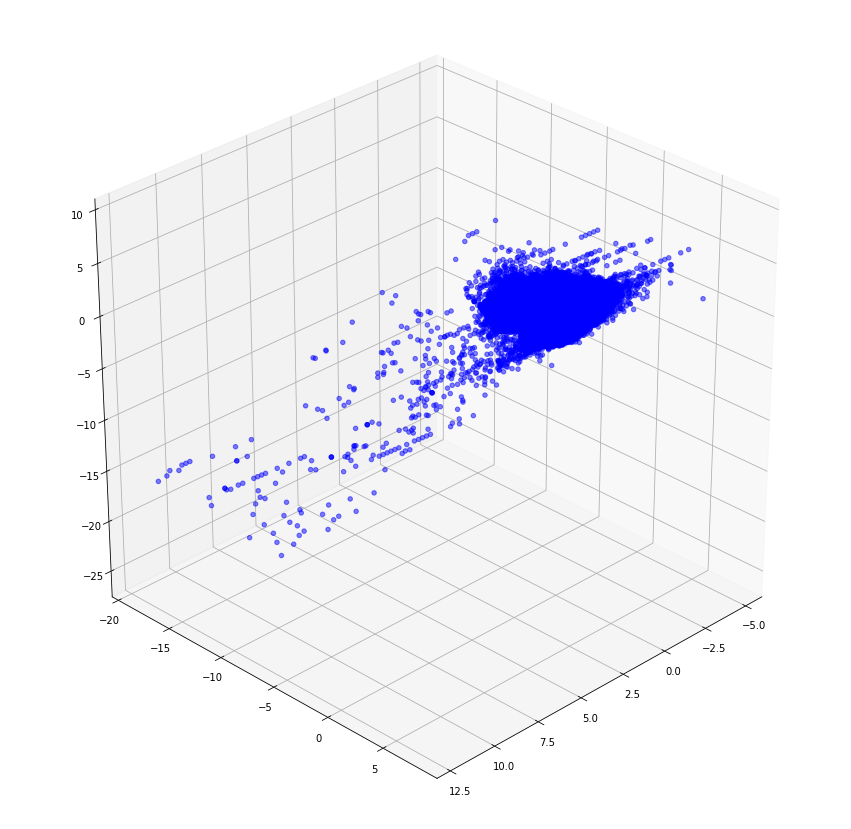

In [77]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(test['V11'], test['V12'], test['V17'], alpha = 0.5, c = 'b')
ax.view_init(30, 45)
plt.show()

In [78]:
test_select = test.copy()
test_select = test_select[['V11', 'V12', 'V17']]
test_select.head()

,V11,V12,V17
0,-0.551600,-0.617801,0.207971
1,1.612727,1.065235,-0.114805
2,-0.822843,0.538196,-0.237033
3,-1.416907,-0.153826,0.002821
4,-0.259116,-0.326143,-0.809979


In [79]:
test_select_1 = test_select.iloc[0 : 25000 + 1]
test_select_2 = test_select.iloc[25001 : 50000 + 1]
test_select_3 = test_select.iloc[50001 : 75000 + 1]
test_select_4 = test_select.iloc[75001 : 100000 + 1]
test_select_5 = test_select.iloc[100001 : 125000 + 1]
test_select_6 = test_select.iloc[125001 : ]

In [135]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 2.65, min_samples = 50)

In [136]:
predict_1 = pd.DataFrame(model.fit_predict(test_select_1))
predict_1.columns = ['predict']
predict_1[predict_1['predict'] == -1].count()

predict    113
dtype: int64

In [137]:
predict_2 = pd.DataFrame(model.fit_predict(test_select_2))
predict_2.columns = ['predict']
predict_2[predict_2['predict'] == -1].count()

predict    36
dtype: int64

In [138]:
predict_3 = pd.DataFrame(model.fit_predict(test_select_3))
predict_3.columns = ['predict']
predict_3[predict_3['predict'] == -1].count()

predict    36
dtype: int64

In [139]:
predict_4 = pd.DataFrame(model.fit_predict(test_select_4))
predict_4.columns = ['predict']
predict_4[predict_4['predict'] == -1].count()

predict    49
dtype: int64

In [140]:
predict_5 = pd.DataFrame(model.fit_predict(test_select_5))
predict_5.columns = ['predict']
predict_5[predict_5['predict'] == -1].count()

predict    30
dtype: int64

In [141]:
predict_6 = pd.DataFrame(model.fit_predict(test_select_6))
predict_6.columns = ['predict']
predict_6[predict_6['predict'] == -1].count()

predict    13
dtype: int64

In [142]:
total_predict = pd.concat([predict_1, predict_2, predict_3, predict_4, predict_5, predict_6], ignore_index = True)
total_predict.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [143]:
total_predict.shape

(142503, 1)

In [144]:
result = []
result_color = []

for i in range(len(total_predict)) :
  if total_predict['predict'][i] == -1 :
    result.append(1)
    result_color.append('r')
  else :
    result.append(0)
    result_color.append('b')

result.count(1)

277

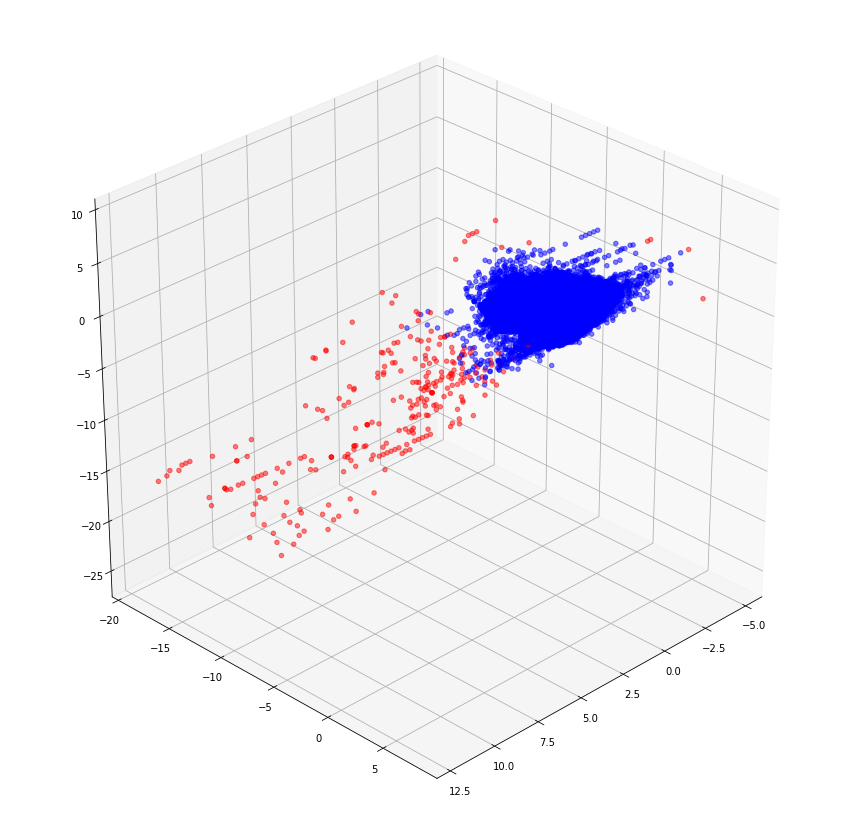

In [145]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(test['V11'], test['V12'], test['V17'], alpha = 0.5, c = result_color)
ax.view_init(30, 45)
plt.show()

In [146]:
answer = pd.concat([test['ID'], pd.DataFrame(result)], axis = 1)
answer.columns = ['ID', 'Class']
answer.set_index('ID', inplace = True)
answer.head()

,Class
ID,
AAAA0x1,0
AAAA0x2,0
AAAA0x5,0
AAAA0x7,0
AAAA0xc,0


In [147]:
answer.shape

(142503, 1)

In [149]:
answer.to_csv('dbscan_eps2_65_min_50.csv')